# 作業目標:

    使用CIFAR100, 數據集變大的影響
    
    
# 作業重點:¶

   了解 CIFAR100 跟 CIFAR10 數據及差異


In [0]:
from keras.datasets import cifar100
import numpy as np
import math
np.random.seed(10)

# 資料準備

In [0]:
# 從網路即時下載CIFAR100⼩圖像，數據集涵蓋50,000張32x32彩⾊色訓練圖像及10,000張測試圖像，並且標註超過100個類別
(x_img_train, y_label_train), (x_img_test, y_label_test) = cifar100.load_data()

# 查詢檔案維度資訊
print(f"Shape of x_img_train: {x_img_train.shape}")
print(f"Shape of y_label_train: {y_label_train.shape}")
print(f"Shape of x_img_test: {x_img_test.shape}")
print(f"Shape of y_label_test: {y_label_test.shape}")

169009152/169001437 [==============================] - 6s 0us/step
Shape of x_img_train: (50000, 32, 32, 3)
Shape of y_label_train: (50000, 1)
Shape of x_img_test: (10000, 32, 32, 3)
Shape of y_label_test: (10000, 1)


In [0]:
label_list = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 
              'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 
              'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 
              'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 
              'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 
              'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
              'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
              'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
              'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
              'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
              'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
              'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
              'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
              'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

label_dict = dict(zip(range(0, len(label_list)), label_list))

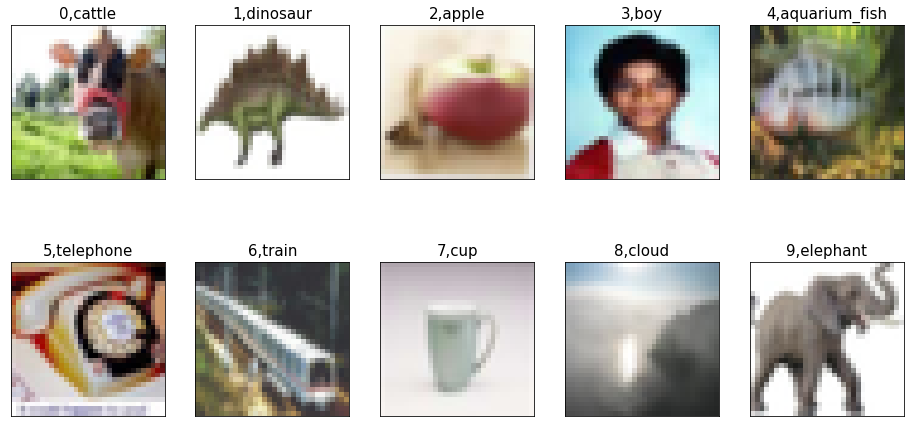

In [0]:
# 導入影像列印模組
import matplotlib.pyplot as plt

# 宣告一個影像標記的函數
def plot_images_labels_prediction(images, labels, prediction, idx, num):
    # 創造 rows x cols 的子圖
    cols = 5
    rows = math.ceil(num / cols)
    figure, ax = plt.subplots(rows, cols ,figsize=(16,8))

    for i in range(0, num):
        # 鎖定子圖位置
        plt.subplot(rows, cols, 1+i)
        
        # 顯示 images 內第幾張圖片
        plt.imshow(images[idx])

        # 顯示 images 內第幾張圖片的標題        
        title = str(i)+','+label_dict[labels[idx][0]]
        idx += 1 

        # 待確認功能
        if len(prediction)>0:
            title += '=>'+label_dict[prediction[i]]

        # 一些畫圖設定  
        plt.title(title, fontsize=15) 
        plt.xticks([]); plt.yticks([])

#針對不同的影像作標記
plot_images_labels_prediction(x_img_train, y_label_train, [], idx=0, num=10)

# 影像正規化與OneHot Encoding

In [0]:
from keras.utils import np_utils

# 正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
print(f"Before normalized: shape = {x_img_train.shape} \nfirst pixle: {x_img_train[0][0][0]}")
print(f"After normalized: shape = {x_img_train_normalize.shape} \nfirst pixle: {x_img_train_normalize[0][0][0]}\n")

# OneHot Encodeing
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
print(f"Before OneHot Encodeing: shape = {y_label_train.shape} \nfirst data: {y_label_train[0]}")
print(f"After OneHot Encodeing: shape = {y_label_train_OneHot.shape} \nfirst data: {y_label_train_OneHot[0]}")

Before normalized: shape = (50000, 32, 32, 3) 
first pixle: [255 255 255]
After normalized: shape = (50000, 32, 32, 3) 
first pixle: [1. 1. 1.]

Before OneHot Encodeing: shape = (50000, 1) 
first data: [19]
After OneHot Encodeing: shape = (50000, 100) 
first data: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
